<center><font size="+4">Introduction to Programming and Data Processing 2020/2021</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/StatsAndComputing20202021/raw/main/IPDP/jupyter/jupyterNotebooks/images/SSSA.png" width="700" alt="The extensible parallel architecture of MultiVeStA"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer </font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Lecture 5: </font></center>
<center><font size="+2"> Creation of word clouds for COVID-related online news</font></center>
</center>

---

# Computing and visulatizing the most important words in online news

This example shows that functions can hide a lot of complexity.
* E.g., we can download remote data by just invoking a function
* In particular, in this example we will use the online service [NewsAPI](https://newsapi.org/)
  * Which allows us to download recent online news

This document has been __created by Daniele Licari__ and elaborated by Andrea Vandin.

## The modules we need to use

In [1]:
import sys
!{sys.executable} -m pip install newsapi-python
!{sys.executable} -m pip install wordcloud

In [2]:
# integrating News API into your Python application 
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

# regular expression 
import re

import matplotlib.pyplot as plt

__NewsApiClient__ is a local client for the online service [__NewsAPI__](https://newsapi.org/) that allows you to get news from [eveywhere in the world](https://newsapi.org/sources)
* Intuitively, an online service is like an online function running in a remote server (computer)
* A local client is a piece of code runnning in your machine that communicates with the online service
  * It allows you to easily interact with the online service
  * The interaction is typically done through a set of message exchanges as prescribed by the APIs of the service
* The argument `api_key` is a univoque identifier 
  * necessary when making requests to be identified
  * can be obtained registering [here](https://newsapi.org/register)

There exist many online services accessible with Python
* Most of them follow this api-key approach
* E.g. to enforce subscriptions
* In our case, __we are using a free subscription that allows us to only get the first 250 characters from a news item__

## Implementing two functions for data cleaning

__Stop words__ are usually the most common words in any text ( like “the”, “of”, “to” and “and”), 
* They don’t tell us much about the actual content in a text
* These are the words we want to ignore - this is our data cleaning

We want to find the words that will help us differentiate a text from texts that are about different subjects. 
* __We will filter out the common words__.
* Of course, we are going to use a function for doing this

Furthermore, we want to ignore punctuation 
* A __regular expression__ is a string able to represent many other strings that _match it_
* We are going to use it to delete all punctuation from a string

In [3]:
# to remove STOPWORDS
def removeStopwords(wordlist):
    return [w for w in wordlist if (w not in STOPWORDS) and (w not in {'usa','today','verge','bbc','cnn'})]

# to remove Punctuations
def removePunctuations(txt):
    return re.sub(r'[^\w\s]','',txt)  # all non-alphanumerics are replaced with a blank space using re.


## Data loading

We first get the most relevant articles (top 50) about coronavirus, published in usa-today
* This looks like a normal function invocation
* But under the hood a lot happens to contact the remote service

Luckily, the function `get_everything` hides this complexity to us

In [4]:
json_data = newsapi.get_everything(q='coronavirus',        # All the articles that contain this word
                                    language='en',
                                    sources = 'usa-today', # The newspaper of interest
                                    #sources = 'cnn', # The newspaper of interest
                                    #sources = 'bbc-news', # The newspaper of interest
                                    #sources = 'bbc-news,the-verge'
                                    #
                                    page_size=50,           # Get 50 articles
                                    sort_by='relevancy' 
                                    )
#There exist many more parameters allowing us the ask for more articles, different sources, etc

The return value `json_data` is just a dictionary collecting information about the remote request

In [5]:
print(type(json_data))
print()
print(json_data.keys())
print()
print('The status of the request is',json_data['status'],'There are ',json_data['totalResults'],'articles matching the request.')
print('We got',len(json_data['articles']),'articles')
print()

<class 'dict'>

dict_keys(['status', 'totalResults', 'articles'])

The status of the request is ok There are  708 articles matching the request.
We got 50 articles



We can ignore all the metadata (i.e. the data about the remote request) and focus on the actual articles only

In [6]:
articles = json_data['articles'] 

#Get the description of the first article
content = articles[0]['description']
print('The content:')
print(content)
print('The content is long',len(content),"characters")

The content:
The coronavirus vaccine hopes to "normalize" life for kids. But we can't underestimate how destabilizing reentry will be.
The content is long 121 characters


Now let's combine the content of all the news into variable `contents`

In [7]:
def combine_articles(list_of_articles):
    contents = ''
    for article in list_of_articles:
         #  check if key 'description' has Non-None value in dictionary 
        if article['description']:
            contents += article['description']+" "
            
    return contents

contents = combine_articles(articles)
print('Overall we have',len(contents),'characters')

Overall we have 6743 characters


## Data cleaning, manipulation and visualization 

Now begins the funny part
1. Let's clean the data removing not interesting words
2. Let's compute the frequency of use of words
3. Let's visualize graphically the computed analysis - Word Cloud

In [8]:
# 1 cleaning data
def clean_data(contents):
    print('Before cleaning')
    print(contents[:600])
    print()

    content_to_clean = contents.lower()
    clean_content = removePunctuations(content_to_clean).split()
    clean_content = removeStopwords(clean_content)
    print('After cleaning')
    print(clean_content[:200])
    print()
    return clean_content

clean_content = clean_data(contents)

Before cleaning
The coronavirus vaccine hopes to "normalize" life for kids. But we can't underestimate how destabilizing reentry will be. The much-ballyhooed, steady decline in new coronavirus infections and hospitalizations appears to have stalled, recent data shows. Coronavirus surge of fundraisers on GoFundMe shows why Congress must pass emergency aid for monthly bills, restaurants, small businesses and food. A growing chorus of researchers say now is the time to invest in coronavirus vaccine development and treatments to stop the next pandemic to come. Making a vaccine against the coronavirus is a complic

After cleaning
['coronavirus', 'vaccine', 'hopes', 'normalize', 'life', 'kids', 'cant', 'underestimate', 'destabilizing', 'reentry', 'will', 'muchballyhooed', 'steady', 'decline', 'new', 'coronavirus', 'infections', 'hospitalizations', 'appears', 'stalled', 'recent', 'data', 'shows', 'coronavirus', 'surge', 'fundraisers', 'gofundme', 'shows', 'congress', 'must', 'pass', 'emergenc

In [12]:
# 2 computing word-frequency pairs
def analyze_data(clean_content):
    wordcount = {}
    for w in clean_content:
        if w in wordcount:
            wordcount[w] += 1
        else:
            wordcount[w] = 1
    return wordcount

wordcount = analyze_data(clean_content)

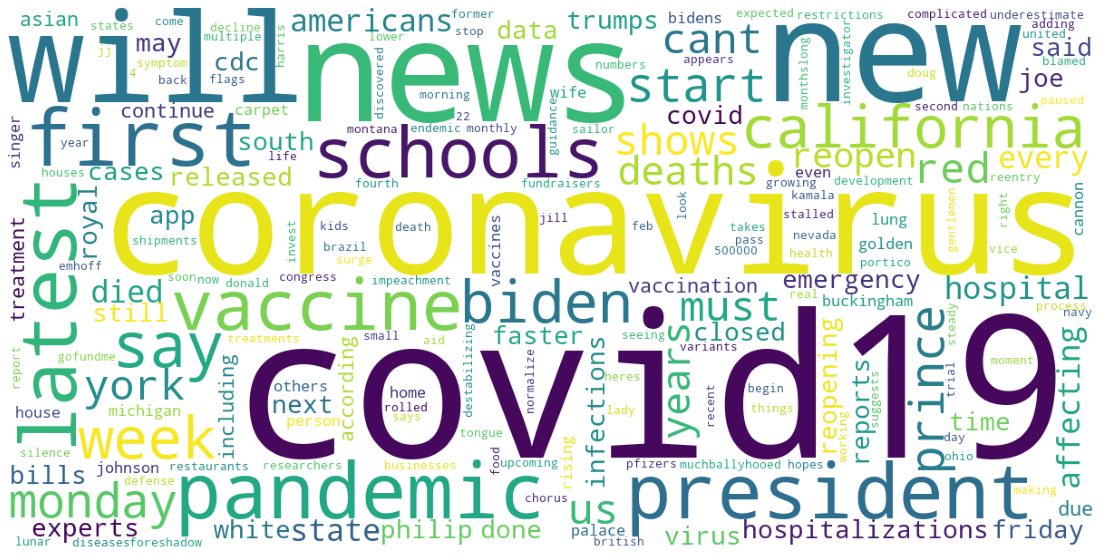

In [13]:
# 3 visualizing the analysisis in a Word Cloud
def visualize_data(wordcount):
    wc = WordCloud(width=1200,height=600, background_color='white').generate_from_frequencies(wordcount)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

visualize_data(wordcount)

## Let's put everything in a function, so that we can run it easily for different sources

In [14]:
#import sys
#!{sys.executable} -m pip install newsapi-python
#!{sys.executable} -m pip install wordcloud

# integrating News API into your Python application 
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

# regular expression 
import re

import matplotlib.pyplot as plt

def make_world_cloud(query,sour,p_size):
    json_data = newsapi.get_everything(q=query,           # All the articles that contain this word
                                       language='en',
                                       sources=sour,      # The newspaper of interest
                                       page_size=p_size,  # Get 50 articles
                                       sort_by='relevancy'   
                                    )
    
    #Combine the articles in one data
    contents = combine_articles(json_data['articles'])
    
    # 1 cleaning data
    clean_content = clean_data(contents)

    # 2 computing word-frequency pairs
    wordcount = analyze_data(clean_content)
 
    # 3 visualizing the analysisis in a Word Cloud
    visualize_data(wordcount)

Before cleaning
The FDA released its analysis of the Johnson & Johnson COVID-19 vaccine. The one-shot vaccine is safe and effective and protects against hospitalization and death. It could be authorized within days. President Biden is set to sign an executive order to address the ongoing semiconductor shortage hampering the production of consumer goods from companies like Apple and PlayStation. Facebook says it will mark some posts about climate change with a label to direct people to vetted information. The feature aimed at quelling misinformation about global warming will launch in the UK before it’s availa

After cleaning
['fda', 'released', 'analysis', 'johnson', 'johnson', 'covid19', 'vaccine', 'oneshot', 'vaccine', 'safe', 'effective', 'protects', 'hospitalization', 'death', 'authorized', 'within', 'days', 'president', 'biden', 'set', 'sign', 'executive', 'order', 'address', 'ongoing', 'semiconductor', 'shortage', 'hampering', 'production', 'consumer', 'goods', 'companies', 'appl

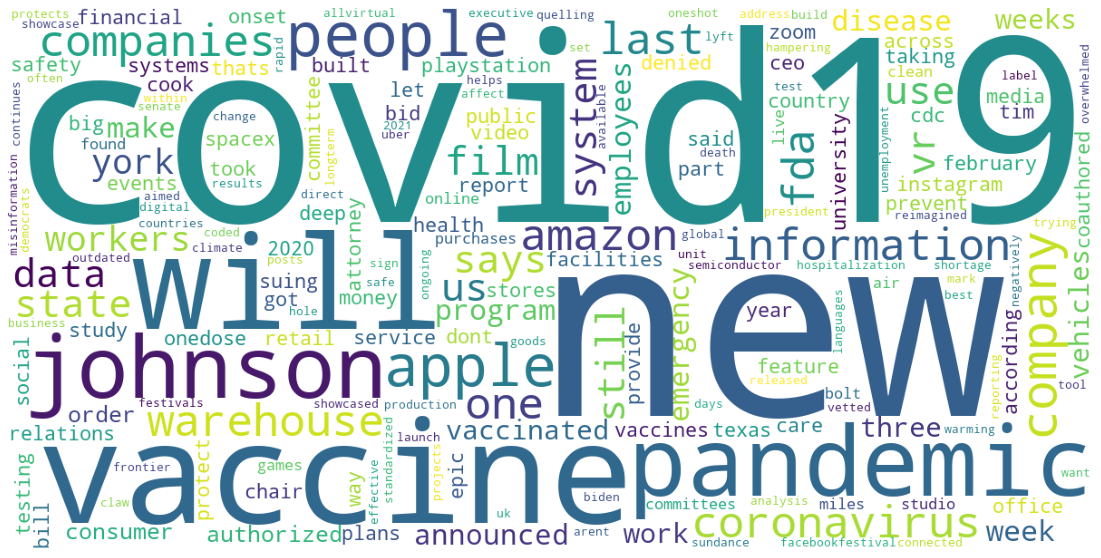

In [15]:
make_world_cloud('coronavirus','the-verge',50)

Before cleaning
The coronavirus aid plan passes despite total Republican opposition, but must now go to the Senate. Singing to the tune of her hit song Jolene, the county star, 75, promotes coronavirus vaccinations. It is the largest decline in decades and the coronavirus pandemic is a major factor, experts say. A traditional herbal remedy said to "cure" Covid has resurfaced, but there's no evidence it works. Tokyo Olympics and Paralympics organisers publish a first set of rules aimed at ensuring coronavirus is controlled. The action comes days before the country is set to begin its rollout of coronavirus vac

After cleaning
['coronavirus', 'aid', 'plan', 'passes', 'despite', 'total', 'republican', 'opposition', 'must', 'now', 'go', 'senate', 'singing', 'tune', 'hit', 'song', 'jolene', 'county', 'star', '75', 'promotes', 'coronavirus', 'vaccinations', 'largest', 'decline', 'decades', 'coronavirus', 'pandemic', 'major', 'factor', 'experts', 'say', 'traditional', 'herbal', 'remedy', 'sai

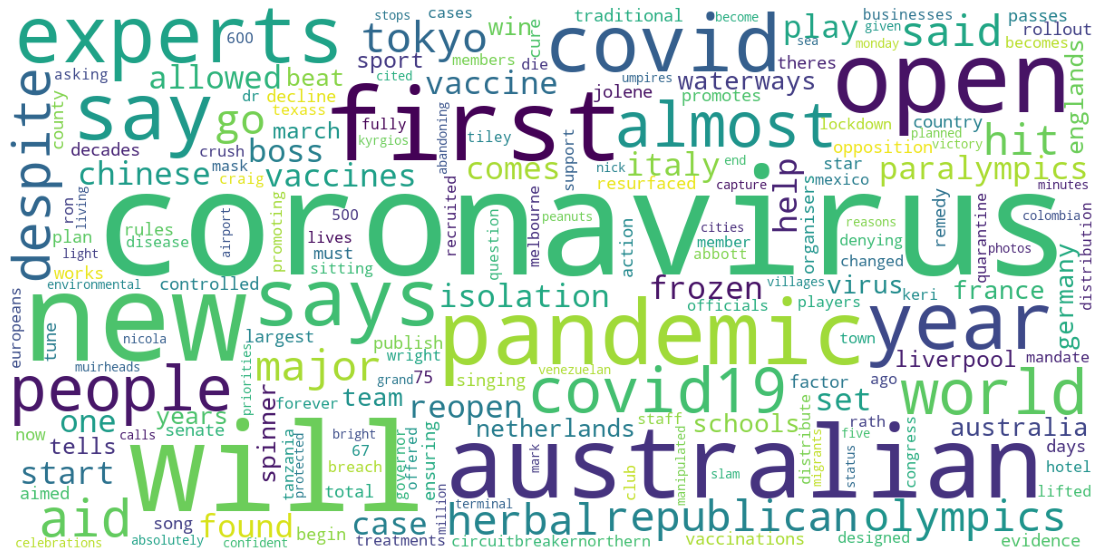

In [16]:
make_world_cloud('coronavirus','bbc-news',50)